A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. Examples of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average.
We will see some important points that can help us in analyzing any time-series dataset. These are:

- Loading time series dataset correctly in Pandas
- Indexing in Time-Series Data
- Time-Resampling using Pandas
- Rolling Time Series
- Plotting Time-series Data using Pandas

Link for dataset https://fred.stlouisfed.org/series/UMTMVS

### Loading time series dataset correctly in Pandas


In [4]:
import pandas as pd

df = pd.read_csv('datos/UMTMVS.csv')
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


In [6]:
### Taking the column date as the index of the data
df = pd.read_csv('datos/UMTMVS.csv', index_col='DATE')
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [7]:
df.index 

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
       '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
      dtype='object', name='DATE', length=348)

In [8]:
### To converte the index row as a datetime object we could use to_datetime

df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='DATE', length=348, freq=None)

In [9]:
### A quickly way is using parse_dates
df = pd.read_csv('datos/UMTMVS.csv', index_col='DATE', parse_dates=True)
df.index


DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='DATE', length=348, freq=None)

### Indexing in Time-Series Data

##### The syntax for this in Pandas is \['starting date':'ending date':step]

In [10]:
### Let’s say I want to get all the data from 2000-01-01 till 2015-05-01. In order to do this, we can simply use indexing in Pandas like this.

df.loc['2000-01-01':'2015-01-01']

,UMTMVS
DATE,
2000-01-01,314656.0
2000-02-01,342744.0
2000-03-01,374859.0
2000-04-01,344093.0
2000-05-01,356402.0
...,...
2014-09-01,512979.0
2014-10-01,505469.0
2014-11-01,458120.0


In [13]:
### Steps of 12 months
df.loc['1992-01-01':'2000-01-01':12]

,UMTMVS
DATE,
1992-01-01,209438.0
1993-01-01,223258.0
1994-01-01,234097.0
1995-01-01,260175.0
1996-01-01,263041.0
1997-01-01,280870.0
1998-01-01,290004.0
1999-01-01,293222.0
2000-01-01,314656.0


### Time-Resampling using Pandas

Think of resampling as groupby() where we group by based on any column and then apply an aggregate function to check our results. Whereas in the Time-Series index, we can resample based on any rule in which we specify whether we want to resample based on “Years” or “Months” or “Days or anything else.

Some important rules for which we resample our time series index are:

- M = Month End
- A = Year-End
- MS = Month Start
- AS = Year Start

In [18]:
df.resample(rule='AS').mean().head()

,UMTMVS
DATE,
1992-01-01,242002.000000
1993-01-01,251708.083333
1994-01-01,269842.666667
1995-01-01,289973.083333
1996-01-01,299765.666667


In [23]:
### We can even use our own custom functions with resample. Let’s say we want to calculate the sum of every year with a custom function. We can do that as follows.

def sum_of_year(year_val):
    return year_val.sum()

df.resample(rule='AS').apply(sum_of_year)

,UMTMVS
DATE,
1992-01-01,2904024.0
1993-01-01,3020497.0
1994-01-01,3238112.0
1995-01-01,3479677.0
1996-01-01,3597188.0
1997-01-01,3834699.0
1998-01-01,3899813.0
1999-01-01,4031887.0
2000-01-01,4208584.0


In [24]:
### We can confirm that it is working correctly by comparing it to
df.resample(rule='AS').apply(sum_of_year) == df.resample(rule='AS').sum()

,UMTMVS
DATE,
1992-01-01,True
1993-01-01,True
1994-01-01,True
1995-01-01,True
1996-01-01,True
1997-01-01,True
1998-01-01,True
1999-01-01,True
2000-01-01,True


### Rolling Time Series
Rolling is also similar to Time Resampling, but in Rolling, we take a window of any size and perform any function on it. In simple words, we can say that a rolling window of size k means k consecutive values.



In [25]:
### Let’s see an example. If we want to calculate the rolling average of 10 days, we can do it as follows.
df.rolling(window=10).mean().head(20) # head to see first 20 values 


,UMTMVS
DATE,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN
1992-06-01,NaN
1992-07-01,NaN
1992-08-01,NaN
1992-09-01,NaN


In [26]:
### Similarly, we can check out the maximum value from a window of 30 days as follows.

df.rolling(window=30).max()[30:].head(20) # head is just to check top 20 values

,UMTMVS
DATE,
1994-07-01,287336.0
1994-08-01,287336.0
1994-09-01,291357.0
1994-10-01,291357.0
1994-11-01,291357.0
1994-12-01,291357.0
1995-01-01,291357.0
1995-02-01,291357.0
1995-03-01,303201.0


### Plotting Time-series Data using Pandas


<AxesSubplot:xlabel='DATE'>

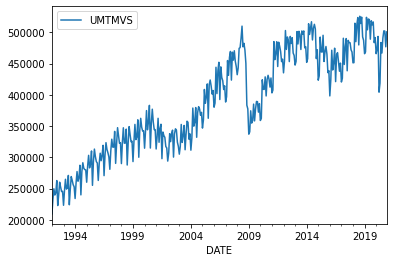

In [27]:
df.plot()


[Text(0.5, 1.0, 'Value of Manufacturers Shipments'), Text(0, 0.5, 'Value')]

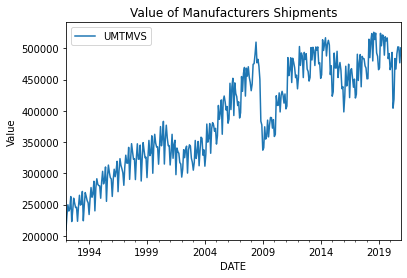

In [28]:
ax = df.plot()
ax.set(title='Value of Manufacturers Shipments', ylabel='Value')


[Text(0.5, 1.0, 'Value of Manufacturers Shipments'), Text(0, 0.5, 'Value')]

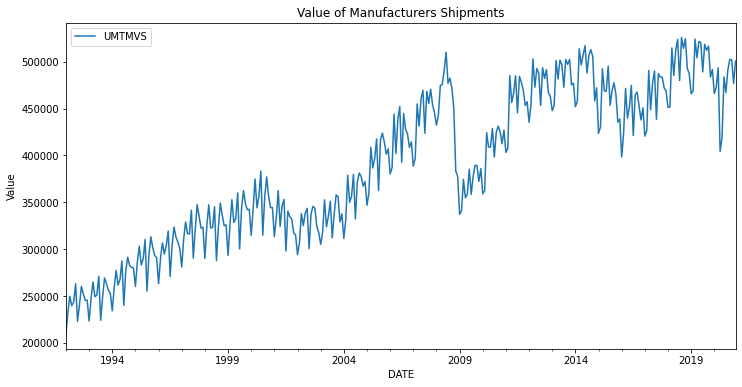

In [30]:
ax = df.plot(figsize=(12,6))
ax.set(title='Value of Manufacturers Shipments', ylabel='Value')

[Text(0.5, 1.0, 'Average of Manufacturers Shipments'),
 Text(0, 0.5, 'Value of Mean of Starting of Year')]

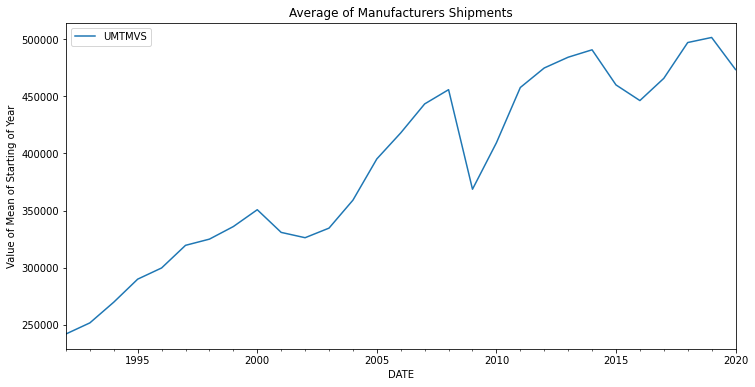

In [31]:
ax = df.resample(rule='AS').mean().plot(figsize=(12,6))
ax.set(title='Average of Manufacturers Shipments', ylabel='Value of Mean of Starting of Year')

[Text(0.5, 1.0, 'Average of Manufacturers Shipments'),
 Text(0, 0.5, 'Value of Mean of Starting of Year')]

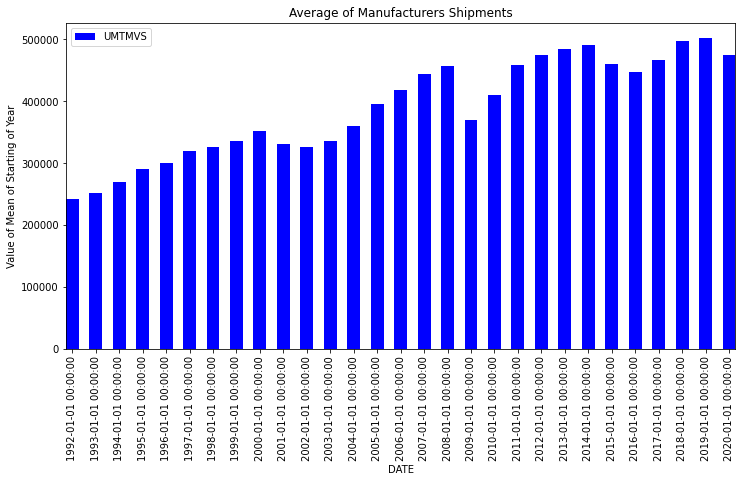

In [58]:
ax = df.resample(rule='AS').mean().plot(kind='bar', figsize=(12,6), color='blue', width=200)
ax.set(title='Average of Manufacturers Shipments', ylabel='Value of Mean of Starting of Year')

In [49]:
df.resample(rule='AS').mean()

,UMTMVS
DATE,
1992-01-01,242002.000000
1993-01-01,251708.083333
1994-01-01,269842.666667
1995-01-01,289973.083333
1996-01-01,299765.666667
1997-01-01,319558.250000
1998-01-01,324984.416667
1999-01-01,335990.583333
2000-01-01,350715.333333


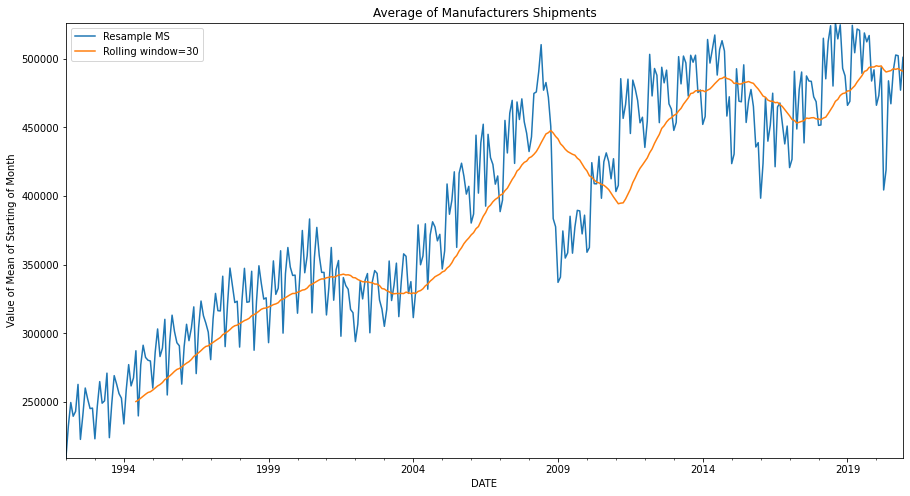

In [67]:
ax = df['UMTMVS'].resample(rule='MS').mean().plot(figsize=(15,8), label='Resample MS')
ax.autoscale(tight=True)  # remove the extra plot portion, which is empty
df.rolling(window=30).mean()['UMTMVS'].plot(label='Rolling window=30')

ax.set(ylabel='Value of Mean of Starting of Month',title='Average of Manufacturers Shipments')
ax.legend()

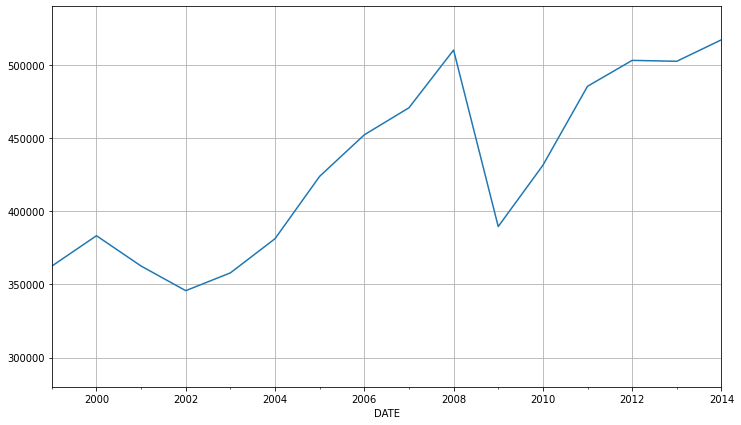

In [68]:
ax = df['UMTMVS'].resample(rule='AS').max().plot(xlim=["1999-01-01","2014-01-01"],ylim=[280000,540000], figsize=(12,7))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

### Learning Outcomes

This brings us to the end of this article. Hopefully, you are now aware of the basics of

- Loading time series dataset correctly in Pandas
- Indexing in Time-Series Data
- Time-Resampling using Pandas
- Rolling Time Series
- Plotting Time-series Data using Pandas